In [1]:
import anndata
import scanpy as sc
import scanpy
import numpy as np
import os

BATCH_LABELS = ("nontreated", "treated")

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Load data set

In [2]:
batches = {}

for batch in BATCH_LABELS:
    filename = "tgfb1-4-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    batches[batch] = anndata.read(filename)

batches

{'nontreated': AnnData object with n_obs × n_vars = 5019 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced',
 'treated': AnnData object with n_obs × n_vars = 7047 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap

## Re-compute UMAP plots

We will re-create the previously generated UMAP plots colored by UMAP clusters and some interesting genes.

creating UMAP for batch nontreated


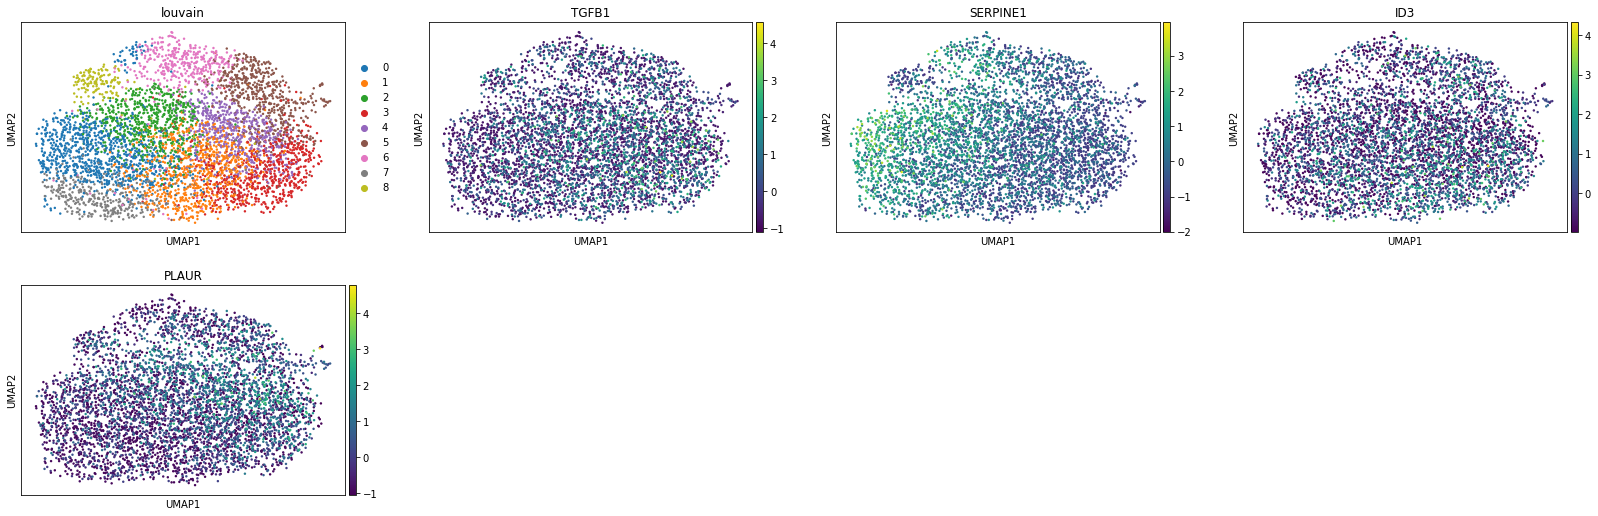

creating UMAP for batch treated


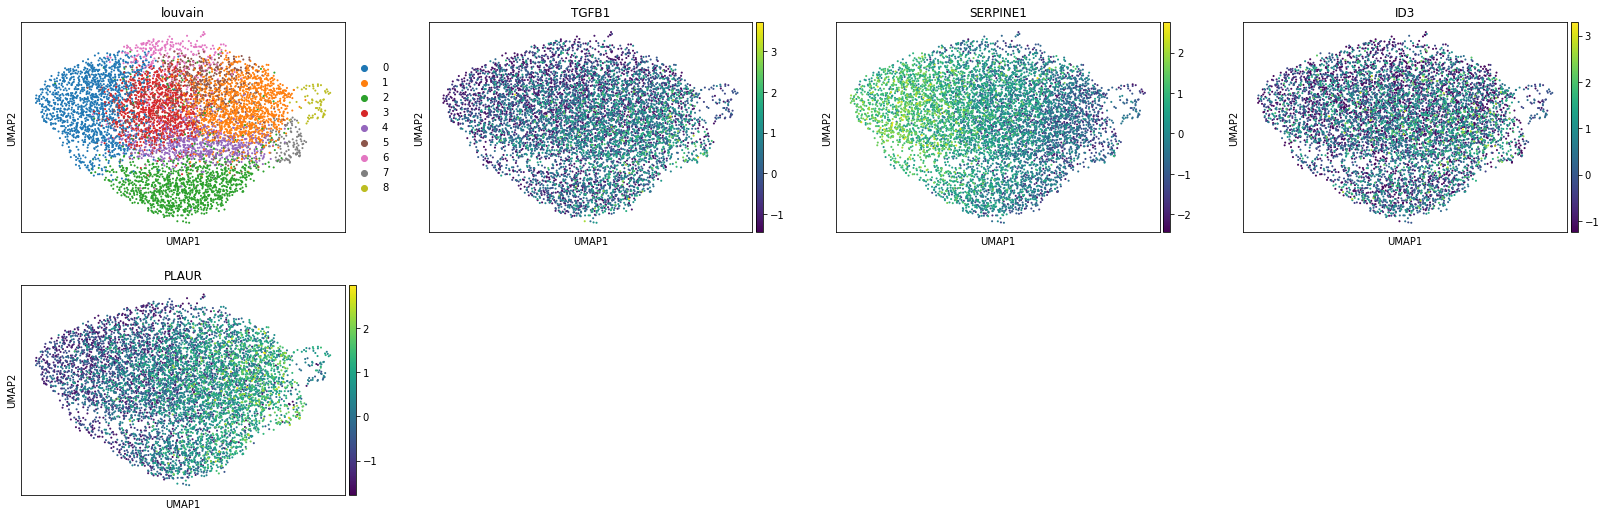

In [3]:
for batch, matrix in batches.items():
    print("creating UMAP for batch", batch)

    sc.pl.umap(matrix, color=['louvain', 'TGFB1', 'SERPINE1', 'ID3', 'PLAUR'])

## Finding marker genes per cluster

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the .raw attribute of AnnData is used in case it has been initialized before. We will use the Mann–Whitney–Wilcoxon test to compute this data.

marker genes per cluster for batch nontreated


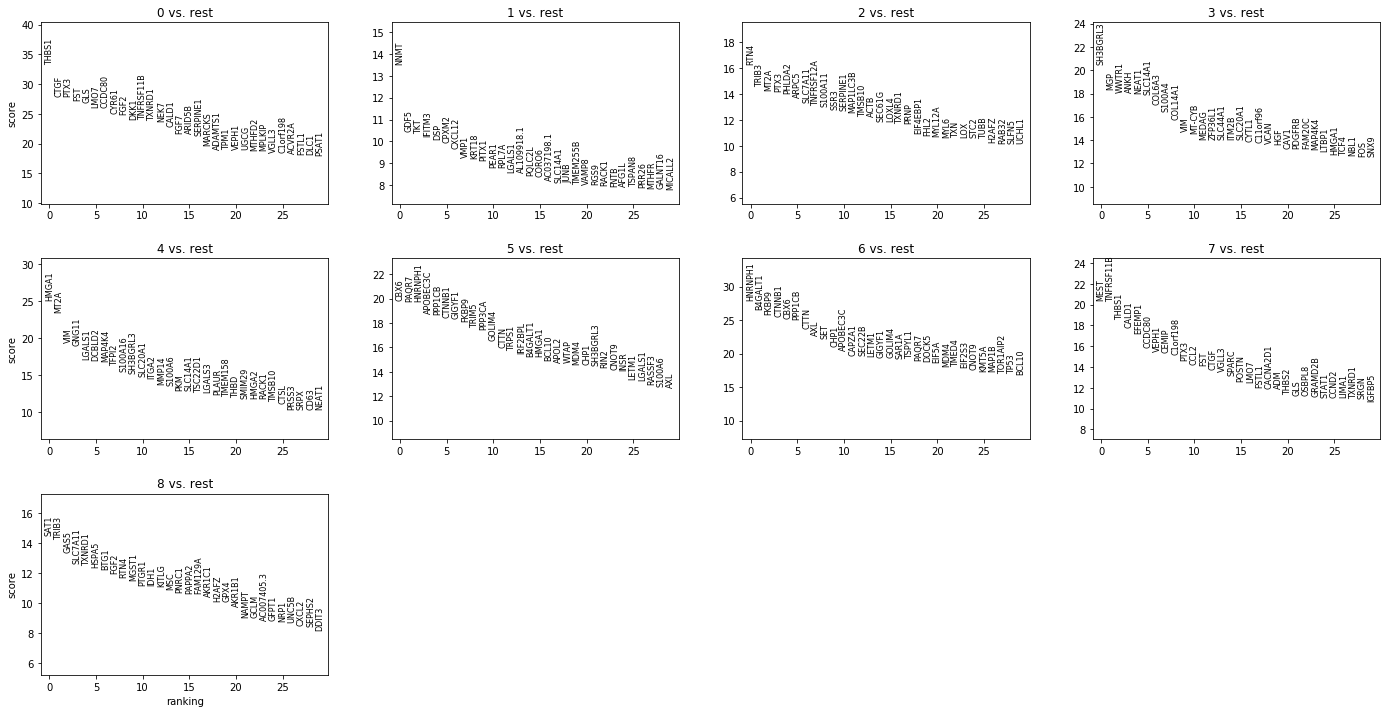

marker genes per cluster for batch treated


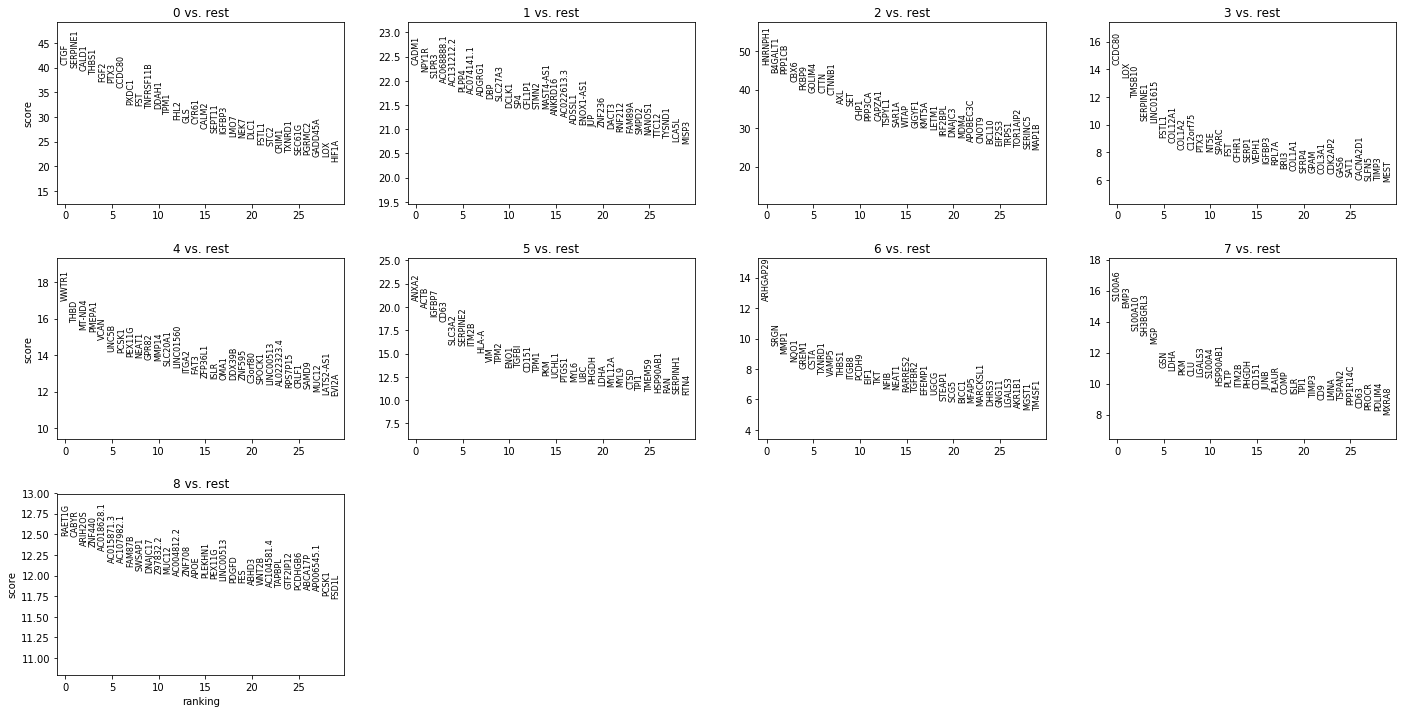

In [4]:
for batch, matrix in batches.items():
    print("marker genes per cluster for batch", batch)

    sc.tl.rank_genes_groups(matrix, 'louvain', method='wilcoxon', corr_method="benjamini-hochberg", n_genes=100)
    sc.pl.rank_genes_groups(matrix, n_genes=30, sharey=False)

## Some analysis I don't have the time to understand

TODO: go through this w/ Adam/Ange

In [5]:
def magic_analysis(matrix, cluster_no, n):
    pvals_adj = np.array(matrix.uns['rank_genes_groups']['logfoldchanges'].tolist()).T[cluster_no][:n].tolist()
    #pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
    names = np.array(matrix.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
    genes = list(zip(names, pvals_adj))
    
    print("something with genes and logged p-values in cluster")
    
    for i, j in genes:
        print(i)
    
    print("now sorting genes by pvalue")
    genes.sort(key=lambda i: i[1], reverse=True)

    print("get those with pvalue > 1")
    for i, j in genes:
        if j > 1:
            print(i, j)
            
    print("get those with pvalue < -1")
    for i, j in genes:
        if j < -1:
            print(i, j)


In [6]:
magic_analysis(batches["treated"], 7, 100)

something with genes and logged p-values in cluster
S100A6
EMP3
S100A10
SH3BGRL3
MGP
GSN
LDHA
PKM
CLU
LGALS3
S100A4
HSP90AB1
PLTP
ITM2B
PHGDH
CD151
JUNB
PLAUR
COMP
ISLR
TPI1
TIMP3
CD9
LMNA
TSPAN2
PPP1R14C
CD63
PROCR
PDLIM4
MXRA8
HLA-A
IGFBP5
CRYAB
ENO1
PCOLCE
CDH6
SCX
SNX9
DNAJA1
FOXC1
HSP90AA1
ADGRG1
LRRC8C
KDELR3
AC112198.2
SLC3A2
ANKH
LTBP1
ODF3B
PRSS3
ENOX1-AS1
DCLK1
ZNF671
CDKN3
ANXA2
SLC27A3
PLPP4
P4HTM
AC010343.3
PRR26
WLS
PILRB
FOS
CADM1
NPY1R
APOBEC3G
AC074141.1
STMN2
PEX11A
IER2
EYS
SMIM14
MORN3
HDX
N4BP2L1
AC131212.2
TTC12
GKAP1
METTL13
S1PR3
ACAD9
LBX2
SLC9A3-AS1
CAV1
HRH1
AL353796.1
MTUS2
C11orf96
CHMP1B2P
ANKRD16
AC010300.1
CORO7
ZNF624
AC007191.1
SGIP1
PLXDC2
KCNN4
NANOS1
GYG2P1
AC109460.1
now sorting genes by pvalue
get those with pvalue > 1
MORN3 5.7224955558776855
TTC12 5.72235631942749
MTUS2 5.722329616546631
LBX2 5.722324848175049
AC074141.1 5.722323894500732
S1PR3 5.722317218780518
ACAD9 5.722311496734619
N4BP2L1 5.722309589385986
CHMP1B2P 5.722309589385986
NANOS1 

In [7]:
magic_analysis(batches["treated"], 8, 100)

something with genes and logged p-values in cluster
RAET1G
CABYR
ARIH2OS
ZNF440
AC018628.1
AC015871.3
AC107982.1
FAM87B
SWSAP1
DNAJC17
Z97832.2
MUC12
AC004812.2
ZNF708
APOE
PLEKHN1
PEX11G
LINC00513
PDGFD
FES
ABHD3
WNT2B
AC104581.4
TAPBPL
GTF2IP12
PCDHGB6
ABCA17P
AP006545.1
PCSK1
FSD1L
AL645924.2
PART1
PSD4
LPAR6
B4GALNT1
MILR1
ZNF611
AL022323.4
WDR4
RPS7P15
AC026356.1
PPFIA3
GPR82
LINC00536
AL033543.1
OS9
HGH1
NTS
Z82217.1
AP006623.1
AL008638.6
AC005070.3
TNFRSF1B
AC096775.1
AC012358.1
LRRN4CL
AC019080.1
AL022311.1
AC124319.4
IL27RA
LATS2-AS1
WFDC3
AP001350.1
MFSD4B
LINC01560
EVI2A
MYO1F
ZNF214
CSPP1
ZCCHC18
DBF4B
AC007750.1
COL21A1
RPP40
AC011498.7
AL359694.2
PINX1
PCDHGA12
ZNF713
GPKOW
AC015799.1
ANGPT2
ANG
MYPOP
JCHAIN
DNAJC12
DRG2
WDR73
S100A3
NINJ2
FBXO36
PLA2G4A
AC109326.1
AC137932.3
UBA7
GSTCD
PTPN22
ABCC9
TRAPPC6B
ZNF85
now sorting genes by pvalue
get those with pvalue > 1
AC124319.4 6.704867839813232
CABYR 6.703526496887207
DRG2 6.703299045562744
RPP40 6.703258991241455
PPFIA3

In [8]:
magic_analysis(batches["treated"], 1, 100)

something with genes and logged p-values in cluster
CADM1
NPY1R
S1PR3
AC068888.1
AC131212.2
PLPP4
AC074141.1
ADGRG1
DBP
SLC27A3
DCLK1
SP4
CFL1P1
STMN2
MAST4-AS1
ANKRD16
AC022613.3
ADSSL1
ENOX1-AS1
JUP
ZNF236
DACT3
RNF212
FAM89A
SMPD2
NANOS1
TTC12
TYSND1
LCA5L
MISP3
BBS9
HRH1
BOLA3-AS1
AC008280.3
ACAD9
FRAT2
EFNB2
CDKN3
NMNAT2
APOBEC3G
CSTF2
ZNF707
ABHD11-AS1
ZNF185
TPRN
SCN8A
HMGXB3
AL353796.1
GPR157
PTMA
GHR
MAMSTR
C21orf62-AS1
CHRNB1
ZNF624
ZKSCAN2
RACK1
SEMA3D
AC112198.2
CHRNE
CCDC170
LDHC
KCNJ8
ENKD1
AC004130.1
LBX2
TP53I11
TNFSF13B
SLC9A3-AS1
PHKA1
TAB1
PCSK9
CHMP1B2P
ADARB1
BRPF1
PIF1
RASSF4
ZNF415
PLAUR
CASTOR3
SGIP1
AC109460.1
EYS
PWP2
PEX11A
TBC1D32
HOXB-AS1
SEPSECS
C2orf88
AC010300.1
FOCAD
DTX2
PRR26
NAA16
FAM21FP
EBF3
C9orf40
RGS14
LGALS1
ZNF404
now sorting genes by pvalue
get those with pvalue > 1
GPR157 2.005669355392456
SEPSECS 2.0056684017181396
LDHC 2.005657434463501
TPRN 2.0056517124176025
S1PR3 2.005650281906128
ACAD9 2.0056498050689697
FOCAD 2.005648612976074
C2orf88

In [9]:
magic_analysis(batches["treated"], 3, 100)

something with genes and logged p-values in cluster
CCDC80
LOX
TMSB10
SERPINE1
LINC01615
FSTL1
COL12A1
COL1A2
C12orf75
PTX3
NT5E
SPARC
FST
CFHR1
SERP1
VEPH1
IGFBP3
RPL7A
BRI3
COL1A1
SFRP4
GPAM
COL3A1
CDK2AP2
GAS6
SAT1
CACNA2D1
SLFN5
TIMP3
MEST
CDH2
CYP1B1
MT-CO3
TMEM167A
MT2A
PRNP
CDH13
CCND2
HSPA5
NEAT1
SEC61G
FGF2
NRP1
GFPT1
COL5A1
COL15A1
EFEMP1
AC018809.2
MAP1LC3B
DNAJB9
SGCG
MT-ND4
PIGB
SNHG8
EPDR1
SEPHS2
ANXA1
POLR3G
EPAS1
SLC7A11
GAS8
FMOD
ZNF33B
MICAL2
SDF2L1
PRRT1
TRIM7
WDPCP
AL357507.1
NLGN4Y
COL5A2
MAK
AC139530.1
MIR22HG
TRMO
ELOVL4
AC010300.1
GPRASP1
LINC01133
DHRS12
SLC29A3
SPX
NEK7
GLRX
AP003469.4
KLHL30-AS1
AC012358.3
VAX2
VDR
PNRC1
RPL23AP32
AC009779.2
DAB2
SCML1
HSPA13
IKZF2
SGMS1-AS1
MROH6
FN1
SLC23A3
now sorting genes by pvalue
get those with pvalue > 1
NLGN4Y 2.546422243118286
IKZF2 2.546405792236328
SGMS1-AS1 2.5464048385620117
AC010300.1 2.546403408050537
SDF2L1 2.546403169631958
VAX2 2.546403169631958
SPARC 2.546402931213379
MAP1LC3B 2.546402931213379
LINC01133 2